Importing the necessary libraries and data

In [419]:
import pandas as pd, seaborn as sns

In [420]:
titanic_train = pd.read_csv(r'.\Titanic data set\train.csv')
titanic_test = pd.read_csv(r'.\Titanic data set\test.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data cleaning and Exploratory analysis

<AxesSubplot:>

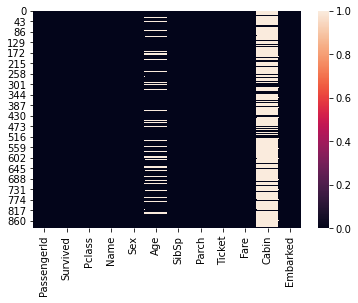

In [421]:
# Null values may mess up the machine learning model(s)
# using heat map to easily visualize columns with null values

sns.heatmap(titanic_train.isnull())

In [422]:
# The age and Cabin column contains too many null values,
# so i removed the Cabin column along with any rows with null values (179 rows)

titanic_train.drop(labels =['Cabin'], axis = 'columns', inplace=True)
titanic_train.dropna(inplace =True)

In [423]:
# Converting categorical columns to interpretable 1s and 0s 

sex = pd.get_dummies(titanic_train['Sex'], drop_first = True)
sex.columns = ['Male']
embarked = pd.get_dummies(titanic_train['Embarked'], drop_first = True)
pclass = pd.get_dummies(titanic_train['Pclass'], drop_first = True, prefix = 'Pclass', prefix_sep = ' ')

In [424]:
# Adding and removing the relevant columns

titanic_train = pd.concat([titanic_train, sex, embarked, pclass], axis = 'columns')
titanic_train.drop(['PassengerId', 'Pclass',
              'Name', 'Ticket', 'Embarked', 'Sex'], axis = 'columns', inplace = True)

Splitting the titanic_train data set into training and testing set

In [425]:
from sklearn.model_selection import train_test_split

In [426]:
X= titanic_train.drop(['Survived'], axis = 'columns')
y = titanic_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Training the machine label with my training set

In [427]:
# Using logistic regression
from sklearn.linear_model import LogisticRegression

In [428]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [429]:
# Testing my model
from sklearn.metrics import confusion_matrix, classification_report

In [430]:
print(confusion_matrix(y_test, y_pred))

[[114  10]
 [ 24  66]]


In [431]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       124
           1       0.87      0.73      0.80        90

    accuracy                           0.84       214
   macro avg       0.85      0.83      0.83       214
weighted avg       0.84      0.84      0.84       214



Final prediction on the actual test data

In [432]:
# Repeating the cleaning proceedure except removing the null values along rows

titanic_test.drop(labels =['Cabin'], axis = 'columns', inplace=True)
#X_test.dropna(inplace =True)

sex = pd.get_dummies(titanic_test['Sex'], drop_first = True)
sex.columns = ['Male']
embarked = pd.get_dummies(titanic_test['Embarked'], drop_first = True)
pclass = pd.get_dummies(titanic_test['Pclass'], drop_first = True, prefix = 'Pclass', prefix_sep = ' ')

titanic_test = pd.concat([titanic_test, sex, embarked, pclass], axis = 'columns')
titanic_test.drop(['PassengerId', 'Pclass',
              'Name', 'Ticket', 'Embarked', 'Sex'], axis = 'columns', inplace = True)

In [433]:
# Impute/Estimate null values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
titanic_test = pd.DataFrame(imputer.fit_transform(titanic_test), columns = [i for i in titanic_test.columns])
titanic_test.head()

,Age,SibSp,Parch,Fare,Male,Q,S,Pclass 2,Pclass 3
0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0.0,1.0
1,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,1.0
2,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,1.0,0.0
3,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0.0,1.0
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0


In [434]:
y_pred = log.predict(titanic_test)
y_pred = pd.Series(y_pred)

survived = pd.DataFrame({'PassengerId':list(range(892, 1310)), 'Survived': y_pred})

In [436]:
# Send results to a csv file for submission

survived.to_csv('survived.csv', index=False)